In [233]:
import numpy as np
import matplotlib.pyplot as plt
from allensdk.api.queries.rma_api import RmaApi
from allensdk.api.queries.grid_data_api import GridDataApi
from brainmap import AllenVolumetricData

In [2]:
rma = RmaApi()

In [229]:
def find_id_ish(gene, sag_or_cor="coronal", adu_or_dev="adult", time_point="P56"):
    """Return the ids of Section Data Sets (a single gene experiment)
    
    Args
    ----
    gene: str
        the gene to search for
    
    sag_or_cor: str (accepts * wild cards)
        `coronal` or `sagittal` or `*`
        
    adu_or_dev: str (accepts * wild cards)
        `adult`, `development`, `both`
    
    time_point: str (it will be autmatically wildcarded)
        e.g. "P56", "E", "E13", "P"
    
    Returns
    -------
    list of ids
    
    """
    
    if adu_or_dev == "adult":
        adu_or_dev = "Mouse"
    elif adu_or_dev == "development":
        adu_or_dev = "DevMouse"
    elif adu_or_dev == "both":
        adu_or_dev = "*Mouse"
    else:
        raise ValueError("adu_or_dev='%s' is not valid" % adu_or_dev)
    criteria = ["[failed$eq'false']",
                "reference_space[name$li'*%s*']" % time_point,
                "products[abbreviation$li'%s']" % adu_or_dev,
                "plane_of_section[name$li'%s']" % sag_or_cor,
                "genes[acronym$eq'%s']" % gene]
    #include='reference_space',
    res = rma.model_query("SectionDataSet",
                    criteria = ','.join(criteria), only=["id"],num_rows='all')
    if isinstance(res, str):
        raise ValueError("Bad query! Server returned :\n%s" % res)
        
    results = []
    for i in res:
        results.append(i["id"])
        
    return results

In [225]:
gda = GridDataApi()

In [223]:
find_id_ish("Gad1", sag_or_cor='coronal', adu_or_dev='adult', time_point='P56')

[79556706, 479]

In [232]:
ls ../data

Adora2a_P56_coronal_72109410_200um.zip
Adora2a_P56_coronal_72109410_200um_intensity.zip
AllenBrain3d/
Gad1_coronal_adult_P56_79556706.zip


In [240]:
gda.download_expression_grid_data(479,path="../data/Gad1_coronal_adult_P56_479.zip")

In [243]:
grid_expression1 = AllenVolumetricData("../data/Gad1_coronal_adult_P56_479.zip")
grid_expression2 = AllenVolumetricData("../data/Gad1_coronal_adult_P56_79556706.zip")

In [237]:
%matplotlib inline

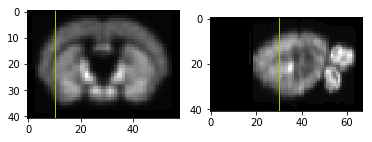

In [244]:
grid_expression1.plot_slides(30,10)

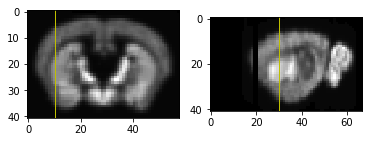

In [245]:
grid_expression2.plot_slides(30,10)

In [ ]:
include = ','.join(['section_data_set','structure','section_data_set(genes, specimen(donor(age)))'])

# [ages.embryonic$eqTrue] can be added
# double parenthesis work as logical and
only = ['expression_energy',
                  'sum_expressing_pixel_intensity',
                  'sum_pixels',
                  'sum_expressing_pixels',
                  'voxel_energy_mean',
                  'voxel_energy_cv',
                  'genes.acronym',
                  'ages.name',
                  'structures.id',
                  "structures.acronym",
                  "structures.st_level",
                  "data_sets.plane_of_section_id",
                  "donors.id"]